ESERCITAZIONE 3 IN JULIA

ESERICIO 1

In [49]:
function varianza_1(x, ::Type{T}=Float64) where {T<:Real}
    media = zero(T)
    for i in 1:length(x)
        media += T(x[i])
    end
    media = T(media / length(x))
    varianza = zero(T)
    for i in 1:length(x)
        varianza += T((T(x[i]) - media)^2)
    end
    varianza /= (length(x) - 1)
    return T(varianza)
end

function varianza_2(x, ::Type{T}=Float64) where {T<:Real}
    u = zero(T)
    v = zero(T)
    for i in 1:length(x)
        v += T(x[i])
        u += T(x[i]^2)
    end
    return Float32((u - T(v^2 / length(x))) / (length(x) - 1))
end


varianza_2 (generic function with 2 methods)

In [50]:
# Dati di input
x_1 = [1e3, 1 + 1e3, 2 + 1e3]
x_2 = [1e6, 1 + 1e6, 2 + 1e6]
x_3 = [1e7, 1 + 1e7, 2 + 1e7]
x_4 = [1e8, 1 + 1e8, 2 + 1e8]
x_5 = [1, 1, 1, 1, 1]

# Stampa risultati
println("Varianza 1, x₁: ", varianza_1(x_1, Float32), "   Varianza 2, x₁: ", varianza_2(x_1, Float32))
println("Varianza 1, x₂: ", varianza_1(x_2, Float32), "   Varianza 2, x₂: ", varianza_2(x_2, Float32))
println("Varianza 1, x₃: ", varianza_1(x_3, Float32), "   Varianza 2, x₃: ", varianza_2(x_3, Float32))
println("Varianza 1, x₄: ", varianza_1(x_4, Float32), "   Varianza 2, x₄: ", varianza_2(x_4, Float32))
println("Varianza 1, x₅: ", varianza_1(x_5, Float32), "   Varianza 2, x₅: ", varianza_2(x_5, Float32))

Varianza 1, x₁: 1.0   Varianza 2, x₁: 1.0
Varianza 1, x₂: 1.0   Varianza 2, x₂: -131072.0
Varianza 1, x₃: 1.0   Varianza 2, x₃: 0.0
Varianza 1, x₄: 0.0   Varianza 2, x₄: 0.0
Varianza 1, x₅: 0.0   Varianza 2, x₅: 0.0


ESERCIZIO 2

a.

In [ ]:
# f(x) = (e^x - 1) / x  naive algorithm
function f1(x; T::Type{<:AbstractFloat}=Float64)
    xT = T(x)
    xT == 0 ? one(T) : (exp(xT) -1)/ xT
end

# k(x) = | x*e^x/(e^x - 1) - 1 |  condition number
function k1(x; T::Type{<:AbstractFloat}=Float64)
    xT = T(x)
    den = exp(xT) - one(T)               # = e^x - 1
    xT == 0 ? zero(T) : abs(xT * exp(xT) / den - one(T))
end

# p(x) serie di Mc Laurin di (e^x - 1)/x fino a ordine "ordine"
function p(x, ordine; T::Type{<:AbstractFloat}=Float64)
    xT = T(x)
    s  = zero(T)
    for n in 0:ordine
        s += (xT^n) / T(factorial(n + 1))
    end
    return s
end


p (generic function with 1 method)

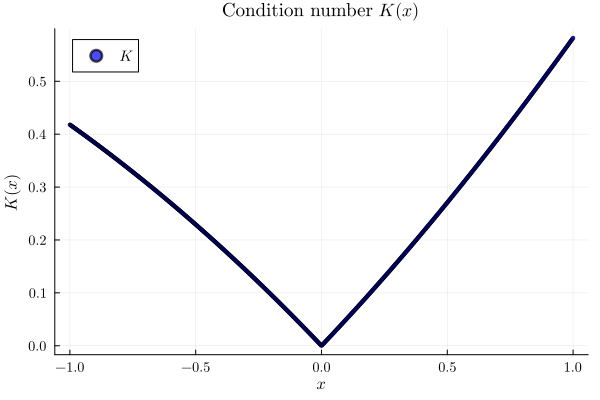

In [ ]:
using Plots, LaTeXStrings
gr()

x = LinRange(-1.0, 1.0, 1000)
y = [k1(xi) for xi in x]

grafico = plot(x, y, seriestype = :scatter, markersize = 2, color = :blue, alpha = 0.7, label = L"$K$")

xlabel!(grafico, L"$x$")
ylabel!(grafico, L"$K(x)$")
title!(grafico,  L"Condition number $K(x)$",
       titlefont = ("Computer Modern", 12, :bold))
display(grafico)

Il massimo K è per x= 1

b.

In [53]:
x = zeros(14)
for i in 3:16
    x[i-2] = 10.0^(-i)
end

y = zeros(14)
y_1 = zeros(14)
y_2 = zeros(14) 
y_3 = zeros(14)
y_4 = zeros(14)
y_5 = zeros(14)

for i in 1:14
    y[i]   = f1(x[i]; T=Float64)
    y_1[i] = p(x[i], 1; T=Float64)
    y_2[i] = p(x[i], 2; T=Float64)
    y_3[i] = p(x[i], 3; T=Float64)
    y_4[i] = p(x[i], 4; T=Float64)
    y_5[i] = p(x[i], 5; T=Float64)
end

println(y)
println(y_1)
println(y_2) 
println(y_3)
println(y_4)
println(y_5)


[1.0005001667083846, 1.000050001667141, 1.000005000006965, 1.0000004999621837, 1.0000000494336803, 0.999999993922529, 1.000000082740371, 1.000000082740371, 1.000000082740371, 1.0000889005823408, 0.9992007221626409, 0.9992007221626409, 1.1102230246251565, 0.0]
[1.0005, 1.00005, 1.000005, 1.0000005, 1.00000005, 1.000000005, 1.0000000005, 1.00000000005, 1.000000000005, 1.0000000000005, 1.00000000000005, 1.000000000000005, 1.0000000000000004, 1.0]
[1.0005001666666666, 1.0000500016666667, 1.0000050000166667, 1.0000005000001668, 1.0000000500000017, 1.000000005, 1.0000000005, 1.00000000005, 1.000000000005, 1.0000000000005, 1.00000000000005, 1.000000000000005, 1.0000000000000004, 1.0]
[1.0005001667083333, 1.0000500016667084, 1.0000050000166667, 1.0000005000001668, 1.0000000500000017, 1.000000005, 1.0000000005, 1.00000000005, 1.000000000005, 1.0000000000005, 1.00000000000005, 1.000000000000005, 1.0000000000000004, 1.0]
[1.0005001667083417, 1.0000500016667084, 1.0000050000166667, 1.0000005000001

d.  Comparison

In [60]:
using DataFrames
using Printf
# Crea DataFrame dai tuoi array
df = DataFrame(
    x = x,
    f = y,
    p_1 = y_1,
    p_2 = y_2,
    p_3 = y_3,
    p_4 = y_4,
    p_5 = y_5
)

# Mostra la tabella
println(df)

# Salva come CSV
using CSV
CSV.write("risultati.csv", df)

14×7 DataFrame
 Row │ x        f         p_1      p_2      p_3      p_4      p_5     
     │ Float64  Float64   Float64  Float64  Float64  Float64  Float64 
─────┼────────────────────────────────────────────────────────────────
   1 │ 0.001    1.0005    1.0005   1.0005   1.0005   1.0005   1.0005
   2 │ 0.0001   1.00005   1.00005  1.00005  1.00005  1.00005  1.00005
   3 │ 1.0e-5   1.00001   1.00001  1.00001  1.00001  1.00001  1.00001
   4 │ 1.0e-6   1.0       1.0      1.0      1.0      1.0      1.0
   5 │ 1.0e-7   1.0       1.0      1.0      1.0      1.0      1.0
   6 │ 1.0e-8   1.0       1.0      1.0      1.0      1.0      1.0
   7 │ 1.0e-9   1.0       1.0      1.0      1.0      1.0      1.0
   8 │ 1.0e-10  1.0       1.0      1.0      1.0      1.0      1.0
   9 │ 1.0e-11  1.0       1.0      1.0      1.0      1.0      1.0
  10 │ 1.0e-12  1.00009   1.0      1.0      1.0      1.0      1.0
  11 │ 1.0e-13  0.999201  1.0      1.0      1.0      1.0      1.0
  12 │ 1.0e-14  0.999201  1.0      

"risultati.csv"